In [1]:
import numpy as np
import pandas as pd
import math
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

In [21]:
pd.set_option('display.max_columns', 48)

## Dataset Description

Chicago Police department vehicle crash data. Link: https://data.cityofchicago.org/Transportation/Traffic-Crashes-Vehicles/68nd-jvt3/data

Chicago Police Department Carsh Data(Linked to vehicle dataset). Link: https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if

In [2]:
df = pd.read_csv("D:\\Datasets\\Traffic_Crashes_-_Vehicles.csv")

C:\Users\debor\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (18,39,40,41,43,47,48,49,54,57,58,60,70) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df_crashes = pd.read_csv("D:\\Datasets\\Traffic_Crashes_-_Crashes.csv")

In [3]:
#Handle Missing values
df = df.dropna(axis = 'columns', thresh=np.floor(len(df)*0.9))
df = df.replace('UNKNOWN', np.nan)
df = df.replace('NONE',np.nan)
df = df.replace('UNKNOWN/NA', np.nan)
df = df.replace('XX', np.nan)
df = df.dropna(axis = 'columns', thresh=np.floor(len(df)*0.9))

In [4]:
df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'])
#df.set_index('CRASH_DATE', inplace=True)

### Exploratory Data Analysis

- Non vehicles (Pedestrians and bicyclists) are labelled as UNIT_NO : 0 if and only if they are the first recorded unit and that is the only time 0 is used, else vehicles start their unit numbers from 1.

- From 6:14 PM, January 18th 2014 to 1:50 AM, December 13th 2018 there have been no incidents with more than 18 vehicles damaged: **max ( df \['UNIT_NO'\] )**

- 5756 pedestrians were involved in vehicle crashes.

- Distribution of accidents over number of units involved in accidents

|    |      Number of Units |   Number of Accidents  |
|----|----------------------|------------------------|
| 0  |                1     |             12012      |
| 1  |                2     |            223497      |
| 2  |                3     |             11464      |
| 3  |                4     |              1892      |
| 4  |                5     |               449      |
| 5  |                6     |               116      |
| 6  |                7     |                48      |
| 7  |                8     |                15      |
| 8  |                9     |                 7      |
| 9  |               10     |                 5      |
|10  |               11     |                 1      |
|11  |               12     |                 1      |
|12  |               16     |                 1      |
|13  |               18     |                 1      | 
    


In [56]:
UNIT_DIST = []
for i,unit in zip(range(len(df_crashes.NUM_UNITS.unique())), df_crashes.NUM_UNITS.unique()):
    if i == 6:
        continue
    else:
        UNIT_DIST.append([unit, len(df_crashes.loc[df_crashes.NUM_UNITS == unit])])

UNIT_DIST = np.array(UNIT_DIST, dtype = int)

UNIT_DIST = UNIT_DIST[UNIT_DIST[:,0].argsort()]

In [16]:
import re
regex = re.compile('INJURIES_')

cols = [string for string in df_crashes.columns if re.match(regex,string)]
df_crashes[cols]

,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,2.0,0.0
3,0.0,0.0,0.0,0.0,0.0,2.0,0.0
4,0.0,0.0,0.0,0.0,0.0,2.0,0.0
5,0.0,0.0,0.0,0.0,0.0,2.0,0.0
6,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.0,0.0,0.0,0.0,0.0,2.0,0.0
8,0.0,0.0,0.0,0.0,0.0,2.0,0.0
9,0.0,0.0,0.0,0.0,0.0,3.0,0.0


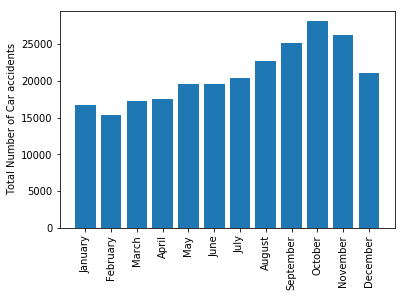

In [64]:
hist_month = [[len(df_crashes.loc[df_crashes['CRASH_MONTH'] == i]),i] for i in df_crashes['CRASH_MONTH'].unique()]
dict_month = {12:'December',11:'November',10:'October',9:'September',8:'August',
             7:'July',6:'June',5:'May',4:'April',3:'March',2:'February',1:'January'}
for i in range(len(hist_month)):
    hist_month[i][1] = dict_month[hist_month[i][1]]

hist_month = np.array(hist_month)[::-1]
                 
plt.bar(hist_month[:,1], hist_month[:,0].astype(int))
plt.ylabel('Total Number of Car accidents')
plt.xticks(rotation = 90)
plt.show()

    Number of car crashes is highest in the month of October.